## **Import libraries and functions :**

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load and inspect the data :**

In [437]:
df = pd.read_csv('/content/MarketPricePrediction.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [438]:
print(df.columns)

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')


# **Select and rename necessary columns :**

In [439]:
df = df[['month','year','quantity','priceMod']]
print(df.shape)
df.head()

(10227, 4)


,month,year,quantity,priceMod
0,January,2005,2350,446
1,January,2006,900,563
2,January,2010,790,1460
3,January,2011,245,3433
4,January,2012,1035,605


**Create a 'yearMonth' column and set it as the index :**

In [440]:
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+" "+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)
df.head()


,month,year,quantity,priceMod
yearMonth,,,,
2005-01-01,January,2005,2350,446
2006-01-01,January,2006,900,563
2010-01-01,January,2010,790,1460
2011-01-01,January,2011,245,3433
2012-01-01,January,2012,1035,605


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10227 entries, 2005-01-01 to 2015-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     10227 non-null  object
 1   year      10227 non-null  int64 
 2   quantity  10227 non-null  int64 
 3   priceMod  10227 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 399.5+ KB


In [442]:
df=df.drop(columns=['month','year'])

In [443]:
df.head()

,quantity,priceMod
yearMonth,,
2005-01-01,2350,446
2006-01-01,900,563
2010-01-01,790,1460
2011-01-01,245,3433
2012-01-01,1035,605


# **Plot quantity and priceMod over time :**

<Axes: xlabel='yearMonth', ylabel='quantity'>

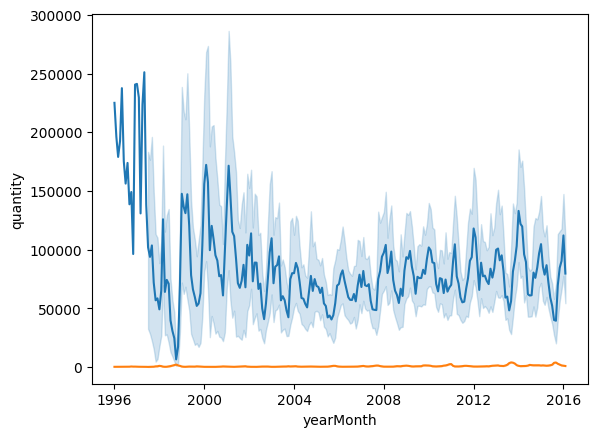

In [444]:
sns.lineplot(data=df,x=df.index,y=df.quantity)
sns.lineplot(data=df,x=df.index,y=df.priceMod)

<Axes: xlabel='yearMonth', ylabel='priceMod'>

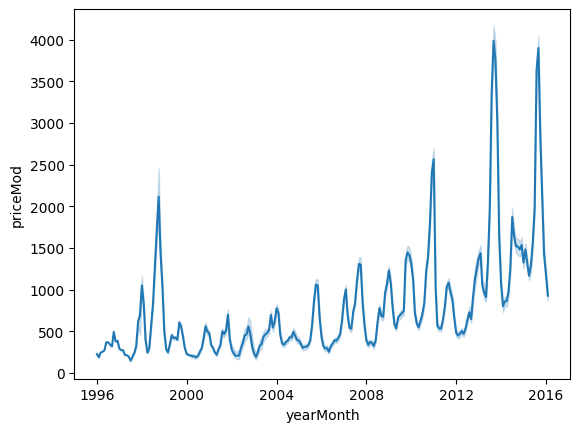

In [445]:
sns.lineplot(data=df,x=df.index,y=df.priceMod)

# **Rolling statistics for 'quantity' :**

In [446]:
 df = df.groupby(level=0).mean()

In [447]:
df['rollMean'] = df.quantity.rolling(window=12).mean()
df['rollStd'] = df.quantity.rolling(window=12).std()
df.head(100)


,quantity,priceMod,rollMean,rollStd
yearMonth,,,,
1996-01-01,225063.000000,226.000000,NaN,NaN
1996-02-01,196164.000000,186.000000,NaN,NaN
1996-03-01,178992.000000,243.000000,NaN,NaN
1996-04-01,192592.000000,254.000000,NaN,NaN
1996-05-01,237574.000000,269.000000,NaN,NaN
...,...,...,...,...
2003-12-01,79991.074074,615.814815,72291.554895,20066.450629
2004-01-01,79955.355556,775.200000,69810.023918,16548.025056
2004-02-01,88728.285714,718.523810,71253.218018,17431.829822


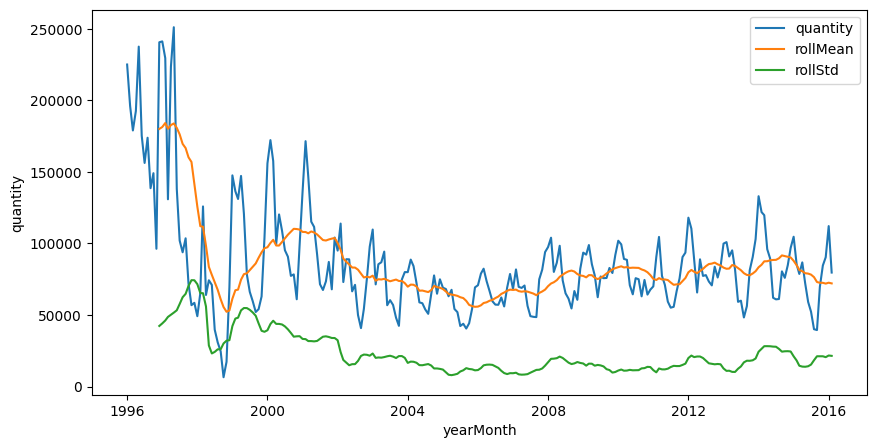

In [448]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.quantity,label='quantity')
sns.lineplot(data=df,x=df.index,y=df.rollMean,label='rollMean')
sns.lineplot(data=df,x=df.index,y=df.rollStd,label='rollStd')

plt.legend()
plt.show()


# **Rolling statistics for 'priceMod' :**

In [449]:
df['rollMean'] = df.priceMod.rolling(window=12).mean()
df['rollStd'] = df.priceMod.rolling(window=12).std()
df.head(100)


,quantity,priceMod,rollMean,rollStd
yearMonth,,,,
1996-01-01,225063.000000,226.000000,NaN,NaN
1996-02-01,196164.000000,186.000000,NaN,NaN
1996-03-01,178992.000000,243.000000,NaN,NaN
1996-04-01,192592.000000,254.000000,NaN,NaN
1996-05-01,237574.000000,269.000000,NaN,NaN
...,...,...,...,...
2003-12-01,79991.074074,615.814815,423.601095,158.786194
2004-01-01,79955.355556,775.200000,468.894277,175.684304
2004-02-01,88728.285714,718.523810,512.713290,165.831973


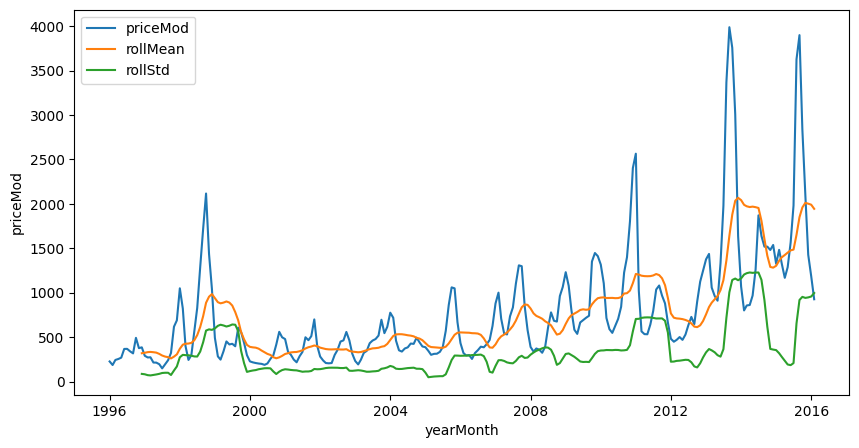

In [450]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.priceMod,label='priceMod')
sns.lineplot(data=df,x=df.index,y=df.rollMean,label='rollMean')
sns.lineplot(data=df,x=df.index,y=df.rollStd,label='rollStd')

plt.legend()
plt.show()


# **ADF test for stationarity :**

In [451]:
from statsmodels.tsa.stattools import adfuller

**For Quantity :**

In [452]:
adfTest = adfuller(df['quantity'],autolag='AIC')

In [453]:
adfTest

(-6.082670116095265,
 1.082777058260364e-07,
 15,
 226,
 {'1%': -3.4596204846395824,
  '5%': -2.8744153028455948,
  '10%': -2.5736320761218576},
 5021.100898960803)

In [454]:
adfTest[0:4]

(-6.082670116095265, 1.082777058260364e-07, 15, 226)

In [455]:
stats = pd.Series(adfTest[0:4],index=['Test Statistics','P value','Lags used','Number of observations used'])
stats


Test Statistics               -6.082670e+00
P value                        1.082777e-07
Lags used                      1.500000e+01
Number of observations used    2.260000e+02
dtype: float64

In [456]:
for key,values in adfTest[4].items():
  print('Criticality',key,':',values)


Criticality 1% : -3.4596204846395824
Criticality 5% : -2.8744153028455948
Criticality 10% : -2.5736320761218576


**For PriceMod : **

In [457]:
adfTest = adfuller(df['priceMod'],autolag='AIC')

In [458]:
adfTest


(-1.5529565759212154,
 0.5071710159736902,
 13,
 228,
 {'1%': -3.4593607492757554,
  '5%': -2.8743015807562924,
  '10%': -2.5735714042782396},
 3117.0423350738133)

In [459]:
adfTest[0:4]

(-1.5529565759212154, 0.5071710159736902, 13, 228)

In [460]:
stats = pd.Series(adfTest[0:4],index=['Test Statistics','P value','Lags used','Number of observations used'])
stats


Test Statistics                 -1.552957
P value                          0.507171
Lags used                       13.000000
Number of observations used    228.000000
dtype: float64

In [461]:
for key,values in adfTest[4].items():
  print('Criticality',key,':',values)


Criticality 1% : -3.4593607492757554
Criticality 5% : -2.8743015807562924
Criticality 10% : -2.5735714042782396


# **Stationarity transformation for 'priceMod' :**

In [462]:
Mp_df = df[['priceMod']]
Mp_df.head()

,priceMod
yearMonth,
1996-01-01,226.0
1996-02-01,186.0
1996-03-01,243.0
1996-04-01,254.0
1996-05-01,269.0


In [463]:
#Time shift

Mp_df['shift'] = Mp_df.priceMod.shift()
Mp_df['shiftDiff']= Mp_df.priceMod - Mp_df['shift']
Mp_df.head()

<ipython-input-463-a3685f18c172>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mp_df['shift'] = Mp_df.priceMod.shift()
<ipython-input-463-a3685f18c172>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mp_df['shiftDiff']= Mp_df.priceMod - Mp_df['shift']


,priceMod,shift,shiftDiff
yearMonth,,,
1996-01-01,226.0,NaN,NaN
1996-02-01,186.0,226.0,-40.0
1996-03-01,243.0,186.0,57.0
1996-04-01,254.0,243.0,11.0
1996-05-01,269.0,254.0,15.0


# **Plot the differenced 'priceMod' :**

In [464]:
Mp_df['rollMean'] = Mp_df.shiftDiff.rolling(window=12).mean()
Mp_df['rollStd'] = Mp_df.shiftDiff.rolling(window=12).std()

In [465]:
Mp_df.dropna(subset=['shiftDiff'], inplace=True)
adfTest = adfuller(Mp_df['shiftDiff'],autolag='AIC')

In [466]:
adfTest[0:4]

(-5.28728699416396, 5.817627863234602e-06, 12, 228)

In [467]:
stats1 = pd.Series(adfTest[0:4],index=['Test Statistics','P value','Lags used','Number of observations used'])
stats1


Test Statistics                 -5.287287
P value                          0.000006
Lags used                       12.000000
Number of observations used    228.000000
dtype: float64

In [468]:
for key,values in adfTest[4].items():
  print('Criticality',key,':',values)

Criticality 1% : -3.4593607492757554
Criticality 5% : -2.8743015807562924
Criticality 10% : -2.5735714042782396


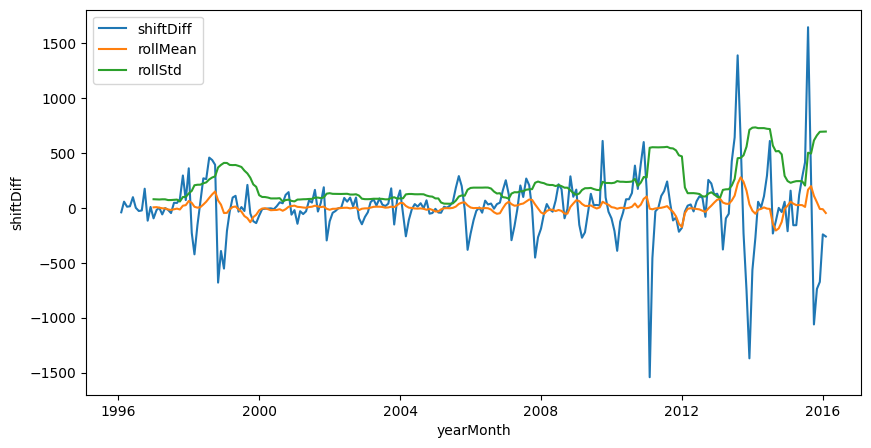

In [469]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Mp_df,x=Mp_df.index,y=Mp_df.shiftDiff,label='shiftDiff')
sns.lineplot(data=Mp_df,x=Mp_df.index,y=Mp_df.rollMean,label='rollMean')
sns.lineplot(data=Mp_df,x=Mp_df.index,y=Mp_df.rollStd,label='rollStd')

plt.legend()
plt.show()


# **Log transformation and stationarity test :**

In [470]:
log_df= df[['priceMod']]
log_df['log'] = np.log(log_df['priceMod'])
log_df.head()

<ipython-input-470-1dda1a09602e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['priceMod'])


,priceMod,log
yearMonth,,
1996-01-01,226.0,5.420535
1996-02-01,186.0,5.225747
1996-03-01,243.0,5.493061
1996-04-01,254.0,5.537334
1996-05-01,269.0,5.594711


In [471]:
log_df['rollMean'] = log_df.log.rolling(window=12).mean()
log_df['rollStd'] = log_df.log.rolling(window=12).std()

<ipython-input-471-552e8c7ed100>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['rollMean'] = log_df.log.rolling(window=12).mean()


In [472]:
log_df.dropna(subset=['log'], inplace=True)
adfTest = adfuller(log_df['log'],autolag='AIC')

In [473]:
stats2 = pd.Series(adfTest[0:4],index=['Test Statistics','P value','Lags used','Number of observations used'])
stats2


Test Statistics                 -2.001270
P value                          0.286017
Lags used                        6.000000
Number of observations used    235.000000
dtype: float64

In [474]:
for key,values in adfTest[4].items():
  print('Criticality',key,':',values)

Criticality 1% : -3.4584868856997004
Criticality 5% : -2.873918902362675
Criticality 10% : -2.573367247623359


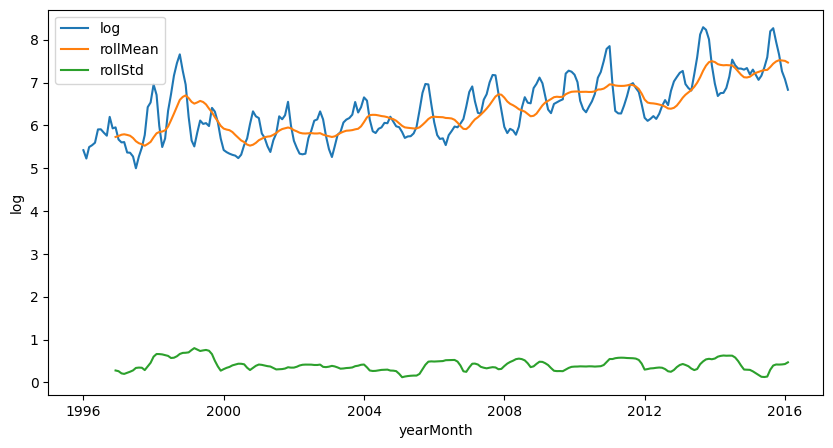

In [475]:
plt.figure(figsize=(10,5))
sns.lineplot(data=log_df,x=log_df.index,y=log_df.log,label='log')
sns.lineplot(data=log_df,x=log_df.index,y=log_df.rollMean,label='rollMean')
sns.lineplot(data=log_df,x=log_df.index,y=log_df.rollStd,label='rollStd')

plt.legend()
plt.show()


# **ARIMA Model for 'quantity' :**

In [476]:
df.head(100)

,quantity,priceMod,rollMean,rollStd
yearMonth,,,,
1996-01-01,225063.000000,226.000000,NaN,NaN
1996-02-01,196164.000000,186.000000,NaN,NaN
1996-03-01,178992.000000,243.000000,NaN,NaN
1996-04-01,192592.000000,254.000000,NaN,NaN
1996-05-01,237574.000000,269.000000,NaN,NaN
...,...,...,...,...
2003-12-01,79991.074074,615.814815,423.601095,158.786194
2004-01-01,79955.355556,775.200000,468.894277,175.684304
2004-02-01,88728.285714,718.523810,512.713290,165.831973


In [477]:
quan =df[['quantity']].copy(deep=True)
quan['firstDiff'] = quan['quantity'].diff()
quan['12Diff'] = quan['quantity'].diff(12)
quan.dropna().head()

,quantity,firstDiff,12Diff
yearMonth,,,
1997-01-01,241225.0,610.0,16162.0
1997-02-01,229550.0,-11675.0,33386.0
1997-03-01,130885.0,-98665.0,-48107.0
1997-04-01,223608.0,92723.0,31016.0
1997-05-01,251132.0,27524.0,13558.0


In [478]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

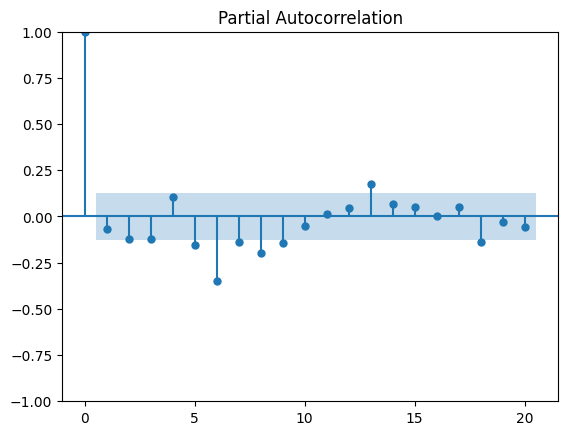

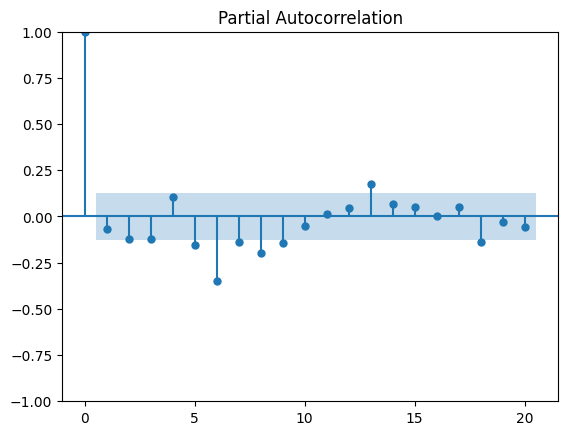

In [479]:
plot_pacf(quan['firstDiff'].dropna(),lags=20)

In [480]:
# p=5,d=1, q=6


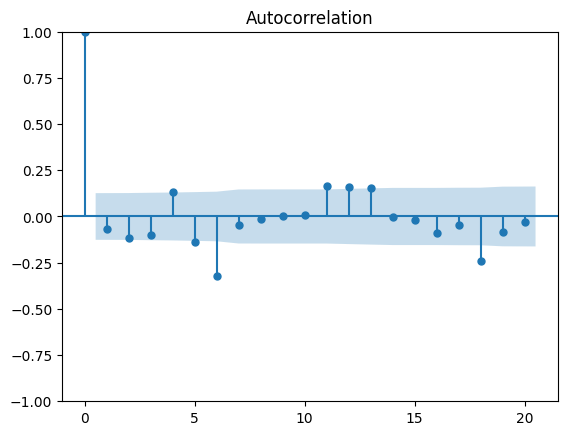

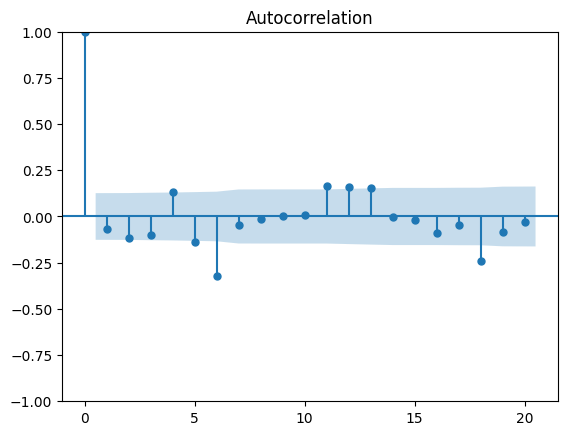

In [481]:
plot_acf(quan['firstDiff'].dropna(),lags=20)

# **Split data into training and testing sets :**

In [482]:
len(quan)

242

In [483]:
round(len(quan)*70/100)

169

In [484]:
train= quan[:round(len(quan)*70/100)]
test= quan[round(len(quan)*70/100):]
train.head()


,quantity,firstDiff,12Diff
yearMonth,,,
1996-01-01,225063.0,NaN,NaN
1996-02-01,196164.0,-28899.0,NaN
1996-03-01,178992.0,-17172.0,NaN
1996-04-01,192592.0,13600.0,NaN
1996-05-01,237574.0,44982.0,NaN


In [485]:
test.head()

,quantity,firstDiff,12Diff
yearMonth,,,
2010-02-01,99365.382353,-2554.255328,7156.075901
2010-03-01,89198.955224,-10166.427129,-9710.657679
2010-04-01,88552.333333,-646.621891,3022.478495
2010-05-01,70820.128571,-17732.204762,-6858.000461
2010-06-01,64463.855072,-6356.273499,2021.967976


In [486]:
from statsmodels.tsa.arima.model import ARIMA


model= ARIMA(train['quantity'],order=(5,1,6))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
quan['arimaPred'] = prediction
quan.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,quantity,firstDiff,12Diff,arimaPred
yearMonth,,,,
2015-10-01,69684.900000,30197.415464,-6298.318750,85201.693277
2015-11-01,84584.707865,14899.807865,-259.617135,90067.447030
2015-12-01,90368.806452,5784.098586,-6574.181784,93561.415540
2016-01-01,112143.650602,21774.844151,7429.235968,94752.536181
2016-02-01,79671.049383,-32472.601220,-5814.761728,93344.953915


In [487]:
quan.dropna().head()

,quantity,firstDiff,12Diff,arimaPred
yearMonth,,,,
2010-02-01,99365.382353,-2554.255328,7156.075901,101943.818593
2010-03-01,89198.955224,-10166.427129,-9710.657679,93560.442880
2010-04-01,88552.333333,-646.621891,3022.478495,87973.089569
2010-05-01,70820.128571,-17732.204762,-6858.000461,83987.400152
2010-06-01,64463.855072,-6356.273499,2021.967976,76027.952661


# **Adding predictions to the dataframe and Plot actual vs predicted quantities:**

<Axes: xlabel='yearMonth', ylabel='quantity'>

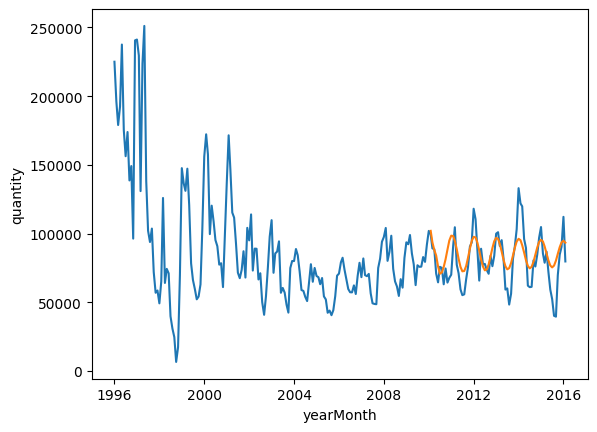

In [488]:
sns.lineplot(data=quan,x=quan.index,y='quantity')

sns.lineplot(data=quan,x=quan.index,y='arimaPred')


# **Calculate RMSE for quantity predictions :**

In [489]:
from sklearn.metrics import mean_squared_error

In [490]:
np.sqrt(mean_squared_error(test['quantity'],prediction))

14907.791036797356

# **SARIMAX model for quantity :**

In [491]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [492]:
quan.tail()

,quantity,firstDiff,12Diff,arimaPred
yearMonth,,,,
2015-10-01,69684.900000,30197.415464,-6298.318750,85201.693277
2015-11-01,84584.707865,14899.807865,-259.617135,90067.447030
2015-12-01,90368.806452,5784.098586,-6574.181784,93561.415540
2016-01-01,112143.650602,21774.844151,7429.235968,94752.536181
2016-02-01,79671.049383,-32472.601220,-5814.761728,93344.953915


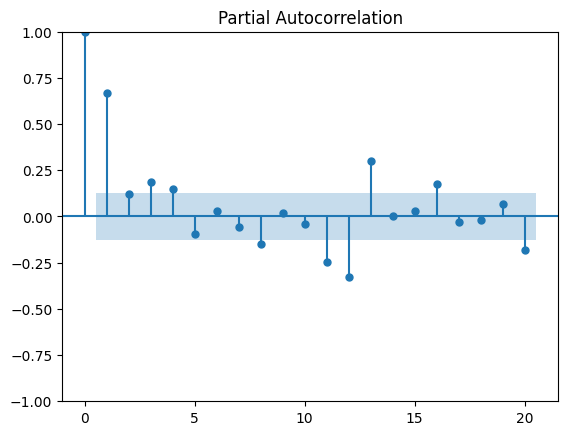

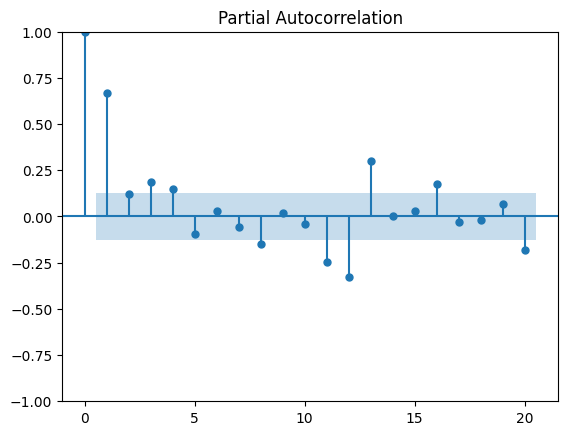

In [493]:
plot_pacf(quan['12Diff'].dropna(),lags=20)

In [494]:
#p=1,d=1,q=1

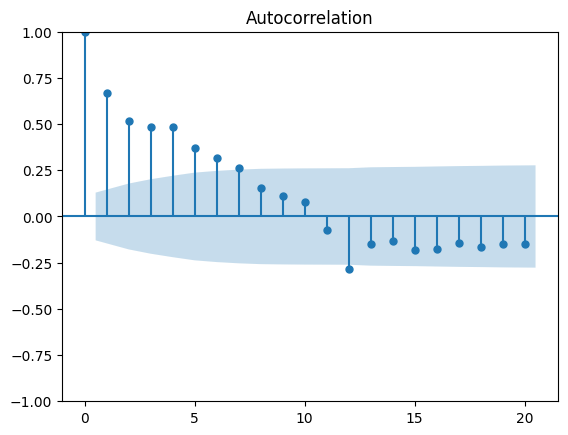

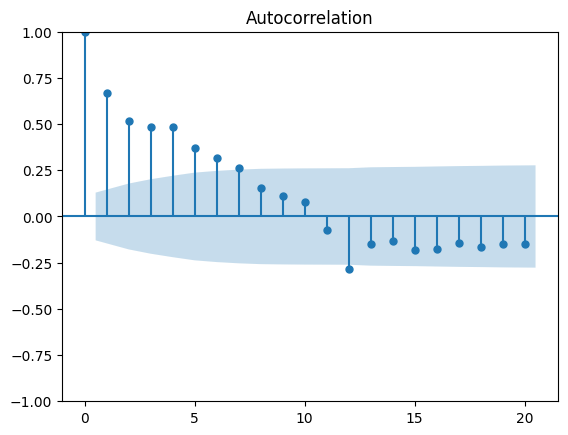

In [495]:
plot_acf(quan['12Diff'].dropna(),lags=20)

In [496]:
model= SARIMAX(train['quantity'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
quan['sarimaxPred'] = prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [497]:
quan.tail()

,quantity,firstDiff,12Diff,arimaPred,sarimaxPred
yearMonth,,,,,
2015-10-01,69684.900000,30197.415464,-6298.318750,85201.693277,76943.682444
2015-11-01,84584.707865,14899.807865,-259.617135,90067.447030,78135.627417
2015-12-01,90368.806452,5784.098586,-6574.181784,93561.415540,94554.815912
2016-01-01,112143.650602,21774.844151,7429.235968,94752.536181,101786.114283
2016-02-01,79671.049383,-32472.601220,-5814.761728,93344.953915,105411.966096


# **Plot actual vs SARIMAX predicted quantities :**

<Axes: xlabel='yearMonth', ylabel='quantity'>

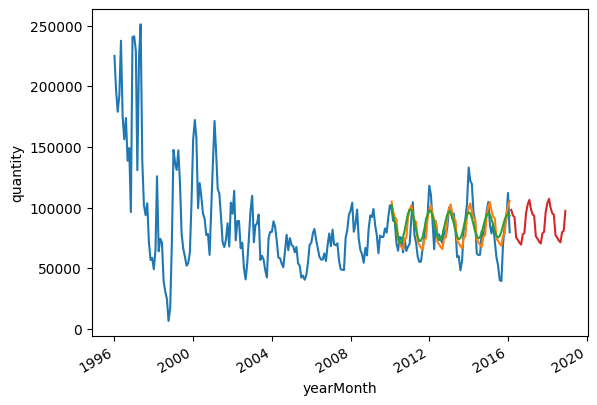

In [498]:
quan.dropna()
sns.lineplot(data=quan,x=quan.index,y='quantity')
sns.lineplot(data=quan,x=quan.index,y='sarimaxPred')
sns.lineplot(data=quan,x=quan.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot()

# **Calculate RMSE for quantity SARIMAX predictions :**

In [499]:
np.sqrt(mean_squared_error(test['quantity'],prediction))

13399.527537746872

In [500]:
quan.tail()

,quantity,firstDiff,12Diff,arimaPred,sarimaxPred
yearMonth,,,,,
2015-10-01,69684.900000,30197.415464,-6298.318750,85201.693277,76943.682444
2015-11-01,84584.707865,14899.807865,-259.617135,90067.447030,78135.627417
2015-12-01,90368.806452,5784.098586,-6574.181784,93561.415540,94554.815912
2016-01-01,112143.650602,21774.844151,7429.235968,94752.536181,101786.114283
2016-02-01,79671.049383,-32472.601220,-5814.761728,93344.953915,105411.966096


In [501]:
futureDate= pd.DataFrame(pd.date_range(start='2016-03-01',end='2018-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
2016-03-01
2016-04-01
2016-05-01
2016-06-01
2016-07-01


In [502]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

2016-03-01     98186.559279
2016-04-01     93606.172221
2016-05-01     92224.222657
2016-06-01     75397.787040
2016-07-01     73485.777644
2016-08-01     71039.522994
2016-09-01     69489.636712
2016-10-01     77877.585824
2016-11-01     79069.620457
2016-12-01     95488.888144
2017-01-01    102720.256461
2017-02-01    106346.170054
2017-03-01     99120.817805
2017-04-01     94540.478944
2017-05-01     93158.571950
2017-06-01     76332.173934
2017-07-01     74420.197749
2017-08-01     71973.972432
2017-09-01     70424.112059
2017-10-01     78812.084055
2017-11-01     80004.138900
2017-12-01     96423.424440
2018-01-01    103654.808526
2018-02-01    107280.736046
2018-03-01    100055.396099
2018-04-01     95475.068104
2018-05-01     94093.170706
2018-06-01     77266.781167
2018-07-01     75354.812468
2018-08-01     72908.593764
2018-09-01     71358.739232
2018-10-01     79746.716387
2018-11-01     80938.775789
2018-12-01     97358.065354
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: >

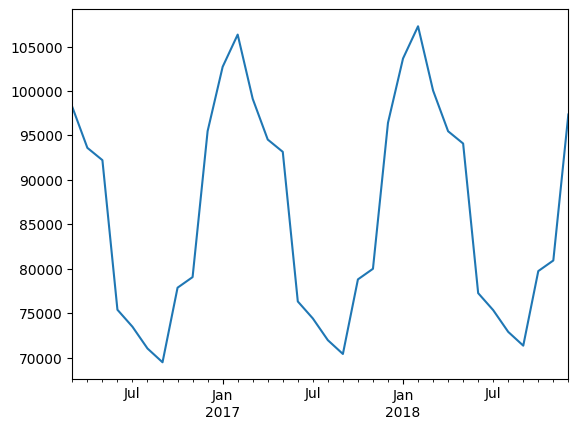

In [503]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot()

# **ARIMA Model for 'priceMod' :**

In [504]:
price = df[['priceMod']].copy(deep=True)
price['Diff'] = price['priceMod'].diff()
price['Diff12'] = price['priceMod'].diff(12)
price.dropna().head()

,priceMod,Diff,Diff12
yearMonth,,,
1997-01-01,290.0,-95.0,64.0
1997-02-01,271.0,-19.0,85.0
1997-03-01,273.0,2.0,30.0
1997-04-01,214.0,-59.0,-40.0
1997-05-01,213.0,-1.0,-56.0


# **Split data into training and testing sets for priceMod :**

In [505]:
len(price)

242

In [506]:
round(len(price)*70/100)


169

In [507]:
trainPrice= price[:round(len(price)*70/100)]
testPrice= price[round(len(price)*70/100):]
trainPrice.dropna().head(100)


,priceMod,Diff,Diff12
yearMonth,,,
1997-01-01,290.000000,-95.000000,64.000000
1997-02-01,271.000000,-19.000000,85.000000
1997-03-01,273.000000,2.000000,30.000000
1997-04-01,214.000000,-59.000000,-40.000000
1997-05-01,213.000000,-1.000000,-56.000000
...,...,...,...
2004-12-01,394.704545,-46.539899,-221.110269
2005-01-01,386.555556,-8.148990,-388.644444
2005-02-01,344.707692,-41.847863,-373.816117


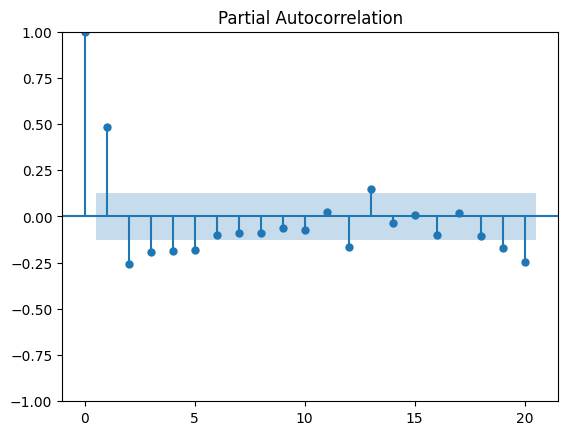

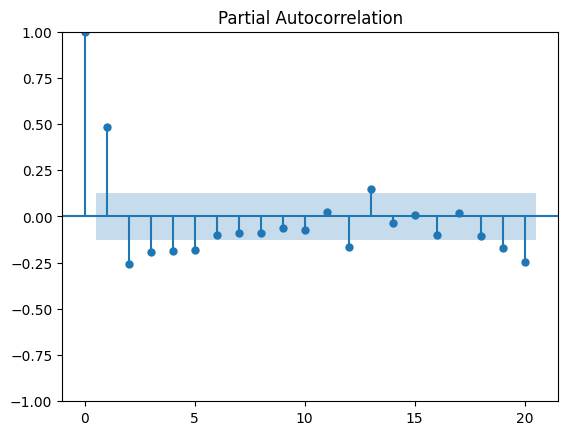

In [508]:
plot_pacf(price['Diff'].dropna(),lags=20)

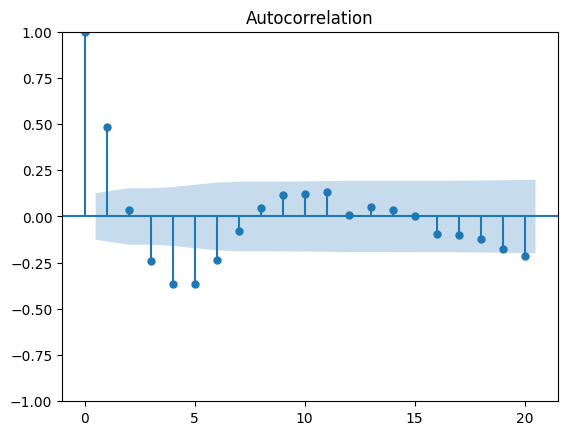

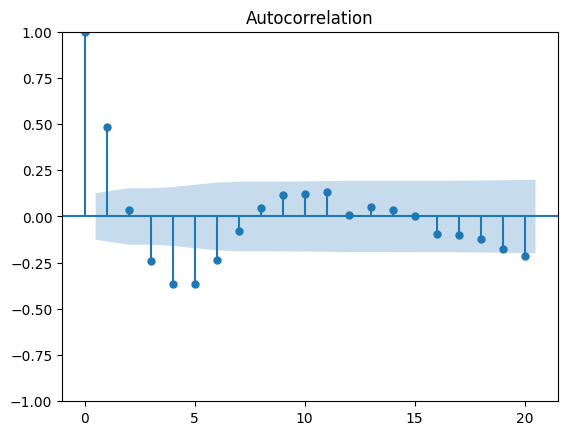

In [509]:
#p=1,
plot_acf(price['Diff'].dropna(),lags=20)

In [510]:
from statsmodels.tsa.arima.model import ARIMA


model= ARIMA(trainPrice['priceMod'],order=(1,1,1))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
price['arimaPredprice'] = prediction
price.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,priceMod,Diff,Diff12,arimaPredprice
yearMonth,,,,
2015-10-01,2838.788889,-1061.396678,1319.742014,1257.26299
2015-11-01,2101.056180,-737.732709,619.756180,1257.26299
2015-12-01,1427.516129,-673.540051,-109.942694,1257.26299
2016-01-01,1186.457831,-241.058298,-138.993388,1257.26299
2016-02-01,926.345679,-260.112152,-556.243210,1257.26299


In [511]:
price.dropna().head()

,priceMod,Diff,Diff12,arimaPredprice
yearMonth,,,,
2010-02-01,1105.985294,-210.797315,28.711101,1275.952415
2010-03-01,715.313433,-390.671861,-90.476890,1263.131552
2010-04-01,589.884058,-125.429375,6.593735,1259.105745
2010-05-01,547.800000,-42.084058,11.251613,1257.841623
2010-06-01,626.608696,78.808696,-38.617111,1257.444683


# **Plot actual vs ARIMA predicted priceMod :**

<Axes: xlabel='yearMonth', ylabel='priceMod'>

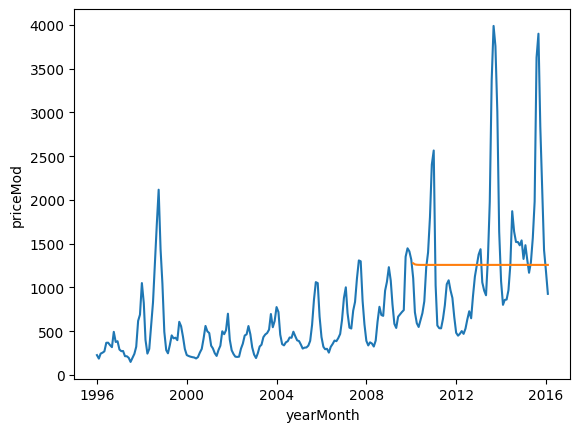

In [512]:
sns.lineplot(data=price,x=price.index,y='priceMod')

sns.lineplot(data=price,x=price.index,y='arimaPredprice')


# **Calculate RMSE for priceMod ARIMA predictions :**

In [513]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(testPrice['priceMod'],prediction))

855.3289388580699

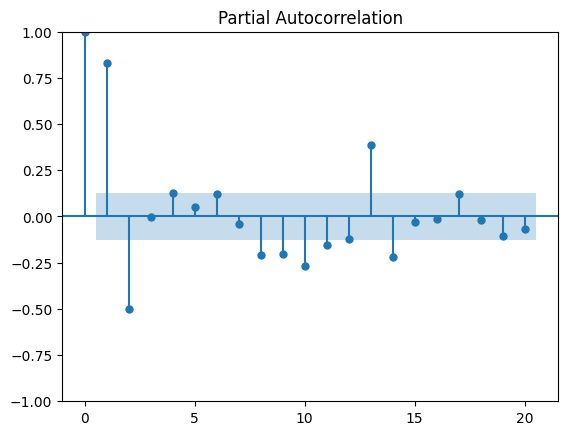

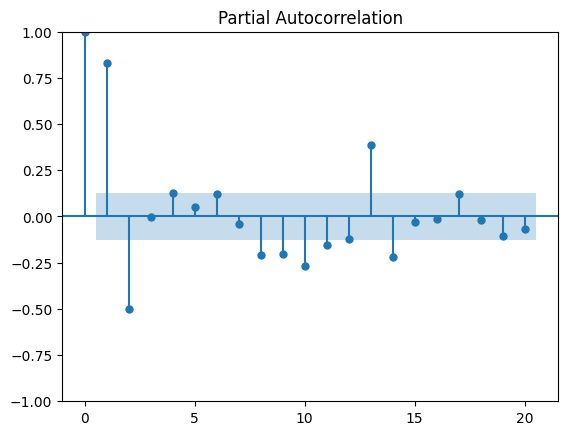

In [514]:
plot_pacf(price['Diff12'].dropna(),lags=20)

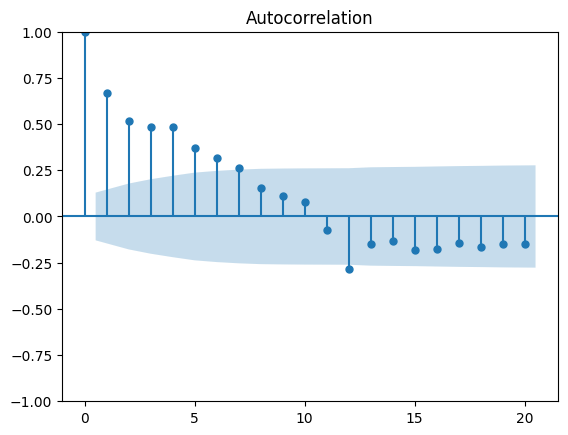

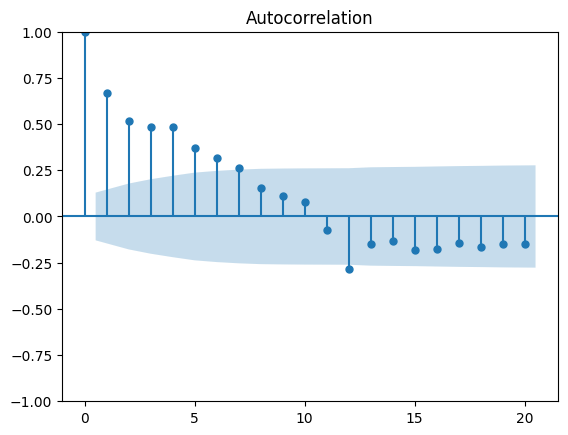

In [515]:
plot_acf(quan['12Diff'].dropna(),lags=20)

# **SARIMAX model for priceMod :**

In [516]:
model= SARIMAX(trainPrice['priceMod'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
price['sarimaxPredPrice'] = prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [517]:
np.sqrt(mean_squared_error(testPrice['priceMod'],prediction))

775.3999028716856

In [518]:
price.tail()

,priceMod,Diff,Diff12,arimaPredprice,sarimaxPredPrice
yearMonth,,,,,
2015-10-01,2838.788889,-1061.396678,1319.742014,1257.26299,1956.814322
2015-11-01,2101.056180,-737.732709,619.756180,1257.26299,1911.590394
2015-12-01,1427.516129,-673.540051,-109.942694,1257.26299,1812.365391
2016-01-01,1186.457831,-241.058298,-138.993388,1257.26299,1777.171948
2016-02-01,926.345679,-260.112152,-556.243210,1257.26299,1704.247068


# **Plot actual vs SARIMAX predicted priceMod :**

<Axes: xlabel='yearMonth', ylabel='priceMod'>

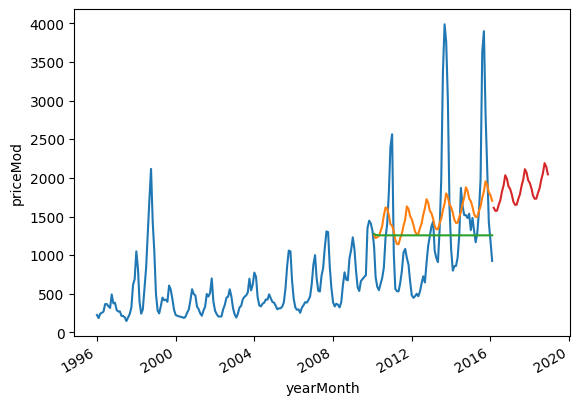

In [519]:
price.dropna()
sns.lineplot(data=price,x=price.index,y='priceMod')
sns.lineplot(data=price,x=price.index,y='sarimaxPredPrice')
sns.lineplot(data=price,x=price.index,y='arimaPredprice')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot()

In [520]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

2016-03-01    1613.916247
2016-04-01    1573.779550
2016-05-01    1575.850717
2016-06-01    1651.197859
2016-07-01    1710.760318
2016-08-01    1821.796654
2016-09-01    1906.058767
2016-10-01    2035.185288
2016-11-01    1989.842747
2016-12-01    1890.563750
2017-01-01    1855.420697
2017-02-01    1782.482248
2017-03-01    1692.108047
2017-04-01    1651.926606
2017-05-01    1653.985780
2017-06-01    1729.346102
2017-07-01    1788.900196
2017-08-01    1899.915778
2017-09-01    1984.162727
2017-10-01    2113.408026
2017-11-01    2068.100382
2017-12-01    1968.837271
2018-01-01    1933.679393
2018-02-01    1860.744935
2018-03-01    1770.383498
2018-04-01    1730.215221
2018-05-01    1732.277923
2018-06-01    1807.634368
2018-07-01    1867.190923
2018-08-01    1978.212611
2018-09-01    2062.464021
2018-10-01    2191.674374
2018-11-01    2146.356463
2018-12-01    2047.088678
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: >

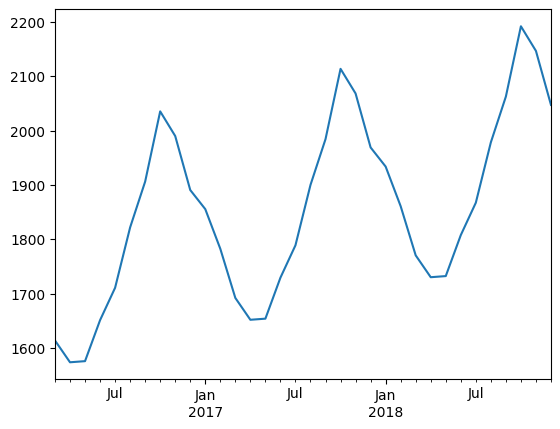

In [521]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot()
